In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
dpi = 200

workdir = '/Users/diana/Dropbox/UW/Research/rasm/gcc_prep/'

import data

In [38]:
vic5_output = xr.open_dataset(os.path.join(workdir, 'imagedriver_monthlymean_1959-1978.nc'))
rasm10_output = xr.open_dataset(os.path.join(workdir, 'rasm10_monthlymean_1959-1978.nc'))
# testfile = xr.open_dataset(os.path.join(workdir, 'test.nc'))

In [36]:
rasm10_output.time.size

256

In [37]:
'''times = []
times.extend(np.arange(0,12))
times.extend(np.arange(13,24))
times.extend(np.arange(25,37))
times.extend(np.arange(38,50))
times.extend(np.arange(51,63))
times.extend(np.arange(64, 76))
times.extend(np.arange(77, 89))
times.extend(np.arange(90, 102))
times.extend(np.arange(103, 115))
times.extend(np.arange(116, 128))
times.extend(np.arange(129, 141))
times.extend(np.arange(142, 154))
times.extend(np.arange(155, 167))
times.extend(np.arange(168, 180))
times.extend(np.arange(181, 193))
times.extend(np.arange(194, 206))
times.extend(np.arange(207, 219))
times.extend(np.arange(220, 232))
times.extend(np.arange(233,245))
times.extend(np.arange(246,258))
# testfile.isel(time=[0,1,2,3,4,5,6,7,8,9,10,11,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).time
testfile.isel(time=times).time'''

'times = []\ntimes.extend(np.arange(0,12))\ntimes.extend(np.arange(13,24))\ntimes.extend(np.arange(25,37))\ntimes.extend(np.arange(38,50))\ntimes.extend(np.arange(51,63))\ntimes.extend(np.arange(64, 76))\ntimes.extend(np.arange(77, 89))\ntimes.extend(np.arange(90, 102))\ntimes.extend(np.arange(103, 115))\ntimes.extend(np.arange(116, 128))\ntimes.extend(np.arange(129, 141))\ntimes.extend(np.arange(142, 154))\ntimes.extend(np.arange(155, 167))\ntimes.extend(np.arange(168, 180))\ntimes.extend(np.arange(181, 193))\ntimes.extend(np.arange(194, 206))\ntimes.extend(np.arange(207, 219))\ntimes.extend(np.arange(220, 232))\ntimes.extend(np.arange(233,245))\ntimes.extend(np.arange(246,258))\n# testfile.isel(time=[0,1,2,3,4,5,6,7,8,9,10,11,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).time\ntestfile.isel(time=times).time'

In [39]:
rasm10_output_seasons = rasm10_output.groupby('time.season').mean('time')
vic5_output_seasons = vic5_output.groupby('time.season').mean('time')
seasons = ['DJF', 'MAM', 'JJA', 'SON']

In [41]:
rasm10_output_seasons

<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 3, season: 4, x: 275, y: 205)
Coordinates:
    longitude      (y, x) float64 9.969e+36 9.969e+36 9.969e+36 9.969e+36 ...
    latitude       (y, x) float64 9.969e+36 9.969e+36 9.969e+36 9.969e+36 ...
  * lev            (lev) float64 1.0 2.0 3.0
  * y              (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * x              (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * bnds           (bnds) int64 0 1
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    Surft          (season, y, x) float64 9.969e+36 9.969e+36 9.969e+36 ...
    Senht          (season, y, x) float64 9.969e+36 9.969e+36 9.969e+36 ...
    Tair           (season, y, x) float64 9.969e+36 9.969e+36 9.969e+36 ...
    Latht          (season, y, x) float64 9.969e+36 9.969e+36 9.969e+36 ...
    Evap           (season, y, x) float64 9.969e+36 9.969e+36 9.969e+36 ...
    Radt           (season, y, x) float64 9.969e+36 9.

Soil Temp, First Layer

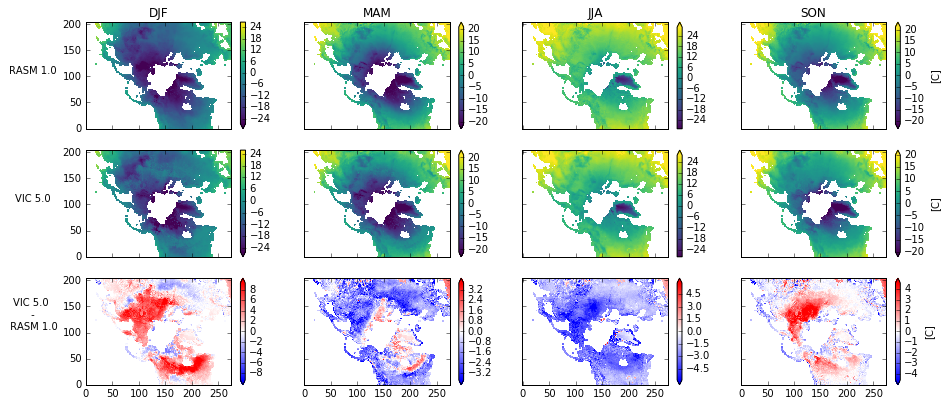

In [46]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
layer = 0
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('VIC 5.0', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('VIC 5.0 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Tsoil'].sel(season=seasons[i]).sel(lev=layer+1).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = vic5_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-4]).sel(nlayer=layer)
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Tsoil'].sel(season=seasons[i-8]).sel(lev=layer+1)
        rasm11 = vic5_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-8]).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_vic5_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots', 'gcc_prep', 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

Soil Temp, First Layer

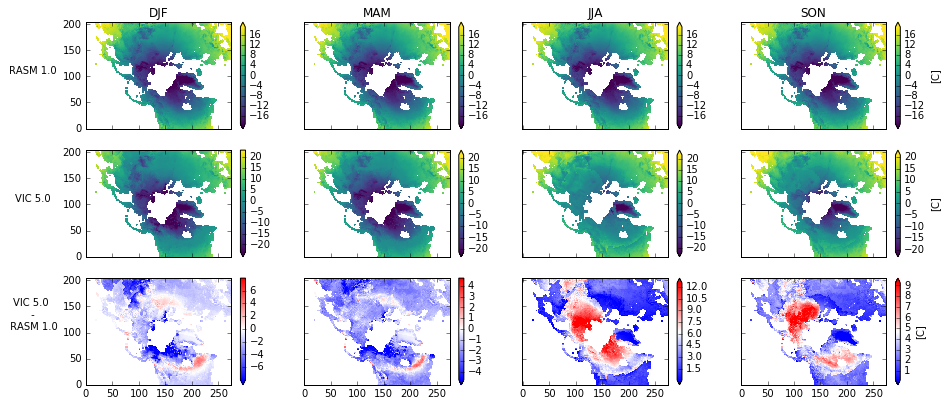

In [47]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
layer = 2
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('VIC 5.0', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('VIC 5.0 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Tsoil'].sel(season=seasons[i]).sel(lev=layer+1).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = vic5_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-4]).sel(nlayer=layer)
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Tsoil'].sel(season=seasons[i-8]).sel(lev=layer+1)
        rasm11 = vic5_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-8]).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_vic5_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots', 'gcc_prep', 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')